#Q1
Time-dependent seasonal components refer to recurring patterns in a time series that vary with time. These patterns repeat at regular intervals, and their characteristics may change over time. Seasonal components can include daily, weekly, monthly, or yearly patterns. These components add a level of complexity to time series analysis.

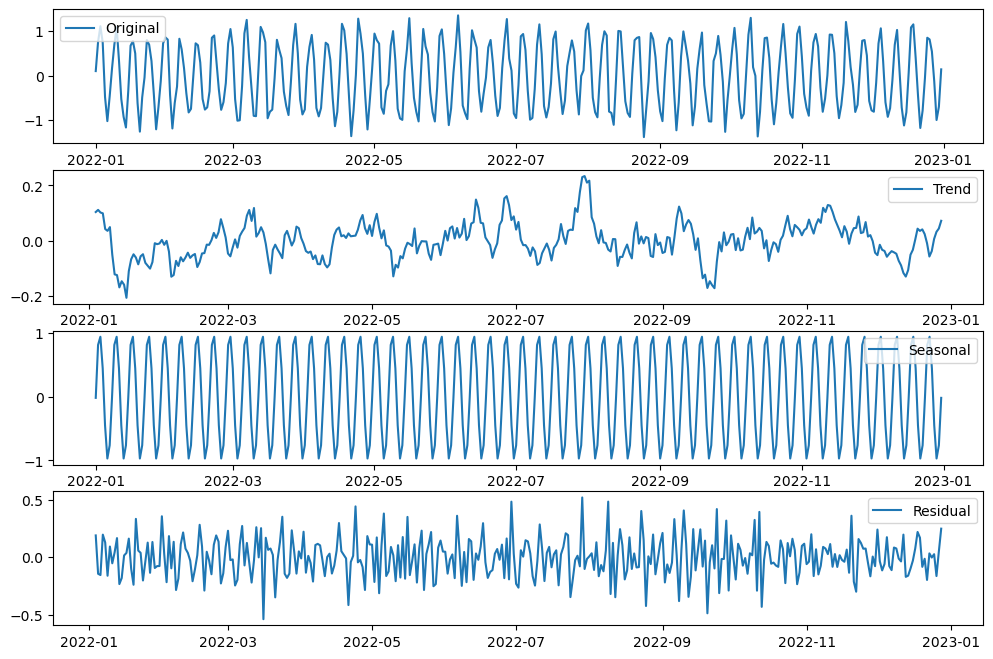

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic data with weekly seasonality
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data = np.sin(2 * np.pi * np.arange(len(date_rng)) / 7) + np.random.normal(scale=0.2, size=len(date_rng))
df = pd.DataFrame(data, columns=['Traffic'], index=date_rng)

# Decompose the time series into trend, seasonality, and residual
result = sm.tsa.seasonal_decompose(df['Traffic'], model='additive', period=7)

# Plot the original, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df['Traffic'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()


plt.show()

#Q2

To identify time-dependent seasonal components in time series data, you can use methods such as:

Visual Inspection: Plot the data and observe recurring patterns.
Seasonal Decomposition of Time Series (STL): This method decomposes a time series into trend, seasonality, and remainder components.
Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF): Examine the autocorrelation structure to identify periodic patterns.

Time-dependent seasonal components can be identified using methods like seasonal decomposition or Fourier analysis. One common approach is to decompose the time series into trend, seasonality, and residual components.

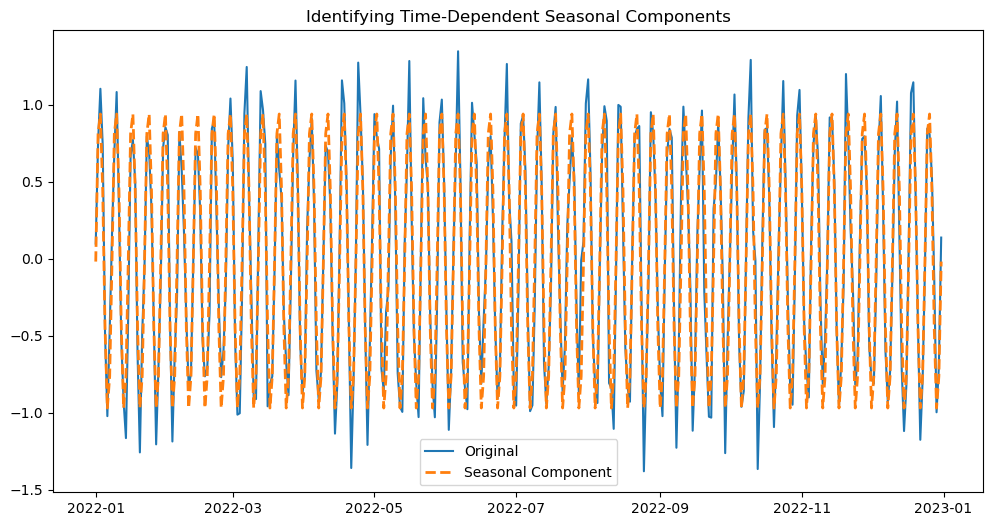

In [2]:
# Using the same data and result from the previous example

# Plot the original time series and the identified seasonality
plt.figure(figsize=(12, 6))
plt.plot(df['Traffic'], label='Original')
plt.plot(result.seasonal, label='Seasonal Component', linestyle='--', linewidth=2)
plt.legend()
plt.title('Identifying Time-Dependent Seasonal Components')
plt.show()

#Q3
Several factors can influence time-dependent seasonal components, including external events, holidays, or changes in consumer behavior. Let's consider an example where a sudden event affects weekly website traffic.

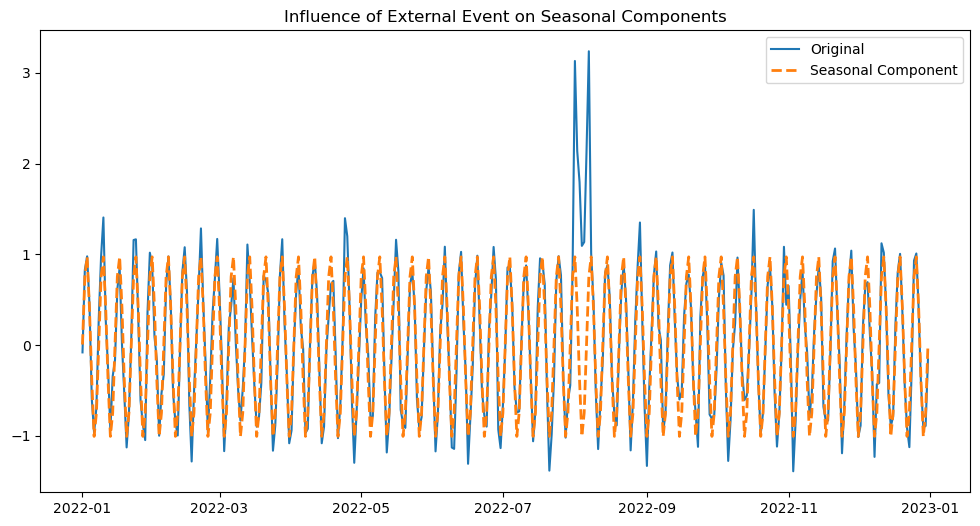

In [3]:
# Modify the synthetic data to include an external event
df['Traffic'] = np.sin(2 * np.pi * np.arange(len(date_rng)) / 7) + np.random.normal(scale=0.2, size=len(date_rng))
df.loc['2022-08-01':'2022-08-07', 'Traffic'] += 2.0  # External event in the first week of August

# Decompose the modified time series
result_with_event = sm.tsa.seasonal_decompose(df['Traffic'], model='additive', period=7)

# Plot the original and modified time series along with the identified seasonality
plt.figure(figsize=(12, 6))
plt.plot(df['Traffic'], label='Original')
plt.plot(result_with_event.seasonal, label='Seasonal Component', linestyle='--', linewidth=2)
plt.legend()
plt.title('Influence of External Event on Seasonal Components')
plt.show()

#Q4
Autoregression models, such as AutoRegressive (AR) models, are used to predict a variable based on its own past values. An AR(p) model expresses the current value as a linear combination of its own past values up to lag p.

Autoregression (AR) models are used in time series analysis to predict future values based on past values. An AR model predicts a variable using its own past values.

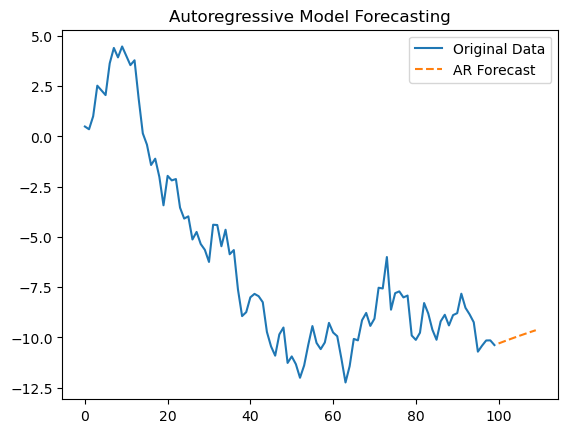

In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Generate synthetic data
np.random.seed(42)
data_ar = np.cumsum(np.random.normal(size=100))

# Fit an autoregressive model (AR(1))
model_ar = ARIMA(data_ar, order=(1, 0, 0))  # p=1, d=0, q=0
results_ar = model_ar.fit()

# Forecast future values
forecast_steps = 10
forecast_ar = results_ar.get_forecast(steps=forecast_steps)

# Plot the original data and the forecast
plt.plot(data_ar, label='Original Data')
plt.plot(np.arange(len(data_ar), len(data_ar) + forecast_steps), forecast_ar.predicted_mean, label='AR Forecast', linestyle='--')
plt.legend()
plt.title('Autoregressive Model Forecasting')
plt.show()

#Q5
To use autoregression models for predicting future time points:

Train the model: Use historical data to estimate the model parameters.

Validate the model: Use a validation dataset to assess the model's performance.

Make predictions: Use the trained model to forecast future values based on past observations.

To use autoregression models for predicting future time points, you can fit the model on historical data and then forecast future values.

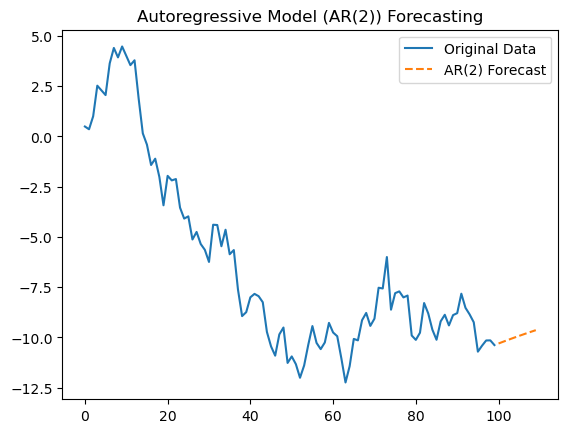

In [5]:
# Generate synthetic data
np.random.seed(42)
data_ar_2 = np.cumsum(np.random.normal(size=100))

# Fit an autoregressive model (AR(2))
model_ar_2 = ARIMA(data_ar_2, order=(2, 0, 0))  # p=2, d=0, q=0
results_ar_2 = model_ar_2.fit()

# Forecast future values
forecast_steps = 10
forecast_ar_2 = results_ar_2.get_forecast(steps=forecast_steps)

# Plot the original data and the forecast
plt.plot(data_ar_2, label='Original Data')
plt.plot(np.arange(len(data_ar_2), len(data_ar_2) + forecast_steps), forecast_ar_2.predicted_mean, label='AR(2) Forecast', linestyle='--')
plt.legend()
plt.title('Autoregressive Model (AR(2)) Forecasting')
plt.show()

#Q6
A Moving Average model is a time series model that represents the relationship between an observation and a residual error from a moving average process. It differs from other models like AR in that it models the relationship between an observation and a residual error term rather than past observations.

A Moving Average (MA) model is a time series model that uses the average of past observations to predict future values. Unlike autoregressive models, MA models focus on the influence of past white noise or random shocks.

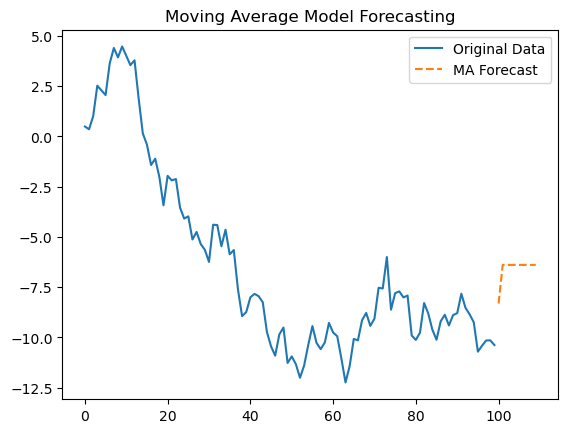

In [9]:
# Generate synthetic data
np.random.seed(42)
data_ma = np.cumsum(np.random.normal(size=100))

# Fit a Moving Average model (MA(1))
model_ma = ARIMA(data_ma, order=(0, 0, 1))  # p=0, d=0, q=1
results_ma = model_ma.fit()

# Forecast future values
forecast_steps = 10
forecast_ma = results_ma.get_forecast(steps=forecast_steps)

# Plot the original data and the forecast
plt.plot(data_ma, label='Original Data')
plt.plot(np.arange(len(data_ma), len(data_ma) + forecast_steps), forecast_ma.predicted_mean, label='MA Forecast', linestyle='--')
plt.legend()
plt.title('Moving Average Model Forecasting')
plt.show()

#Q7
A Mixed Autoregressive Moving Average (ARMA) model combines both autoregressive (AR) and moving average (MA) components. While AR models capture dependencies on past observations, MA models account for dependencies on past forecast errors. A mixed ARMA model is more flexible and can handle a broader range of time series patterns than AR or MA models alone. It is expressed as ARMA(p, q), where p is the order of the autoregressive part, and q is the order of the moving average part.



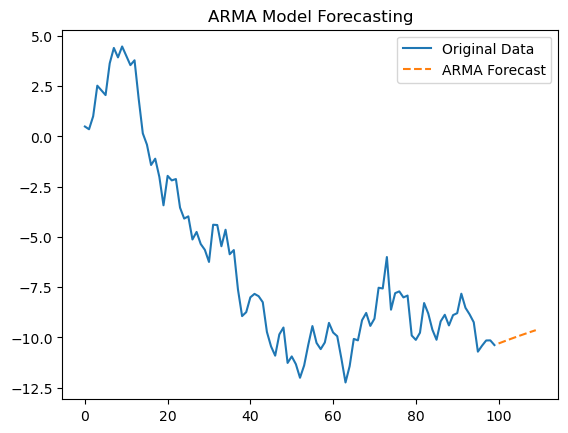

In [7]:
# Generate synthetic data
np.random.seed(42)
data_arma = np.cumsum(np.random.normal(size=100))

# Fit a mixed ARMA model (ARMA(1, 1))
model_arma = ARIMA(data_arma, order=(1, 0, 1))  # p=1, d=0, q=1
results_arma = model_arma.fit()

# Forecast future values
forecast_steps = 10
forecast_arma = results_arma.get_forecast(steps=forecast_steps)

# Plot the original data and the forecast
plt.plot(data_arma, label='Original Data')
plt.plot(np.arange(len(data_arma), len(data_arma) + forecast_steps), forecast_arma.predicted_mean, label='ARMA Forecast', linestyle='--')
plt.legend()
plt.title('ARMA Model Forecasting')
plt.show()